In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from pathlib import Path
from image2image_reg.utils.transform import _convert_df_to_geojson, _convert_geojson_to_df
from image2image_io.readers.geojson_utils import _parse_geojson_data
from image2image_io.readers import get_simple_reader
from copy import deepcopy
import matplotlib.pyplot as plt
from koyo.utilities import 

In [214]:
path = Path("/Users/lgmigas/Documents/_projects_/2025_xenium_brain/xenium-wsireg/2024_05_17_TR_0828746_Donor16_to_2024_05_17_TR_0028746_Donor16_registered.geojson")
reader = get_simple_reader(path)

In [222]:
data = deepcopy(reader.geojson_data)
df, n_to_prop = _convert_geojson_to_df(data, False, 0.65)
data_ = _convert_df_to_geojson(df, df.x, df.y, as_px=False, target_pixel_size=0.65, n_to_prop=n_to_prop)

In [217]:
for outer, dff in df.groupby("outer"):
    pass

In [225]:
df

,x,y,unique_index,outer,inner,type
0,1800.715380,24626.840731,1,0,0,mp
1,1800.675177,24657.613069,1,0,0,mp
2,1803.751667,24657.616728,1,0,0,mp
3,1803.747646,24660.693961,1,0,0,mp
4,1806.824136,24660.697620,1,0,0,mp
...,...,...,...,...,...,...
49629,27446.324795,8178.726748,883,882,0,mp
49630,27446.320775,8181.803982,883,882,0,mp
49631,27443.244285,8181.800323,883,882,0,mp
49632,27443.240265,8184.877557,883,882,0,mp


In [221]:
dff.inner.unique()

array([0])

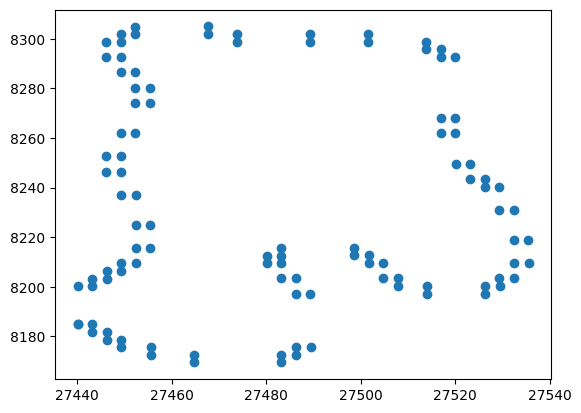

In [219]:
plt.scatter(dff.x, dff.y)

In [121]:
tmp = data[0]["geometry"]["coordinates"]
tmp_ = data_[0]["geometry"]["coordinates"]

In [124]:
for i in range(len(tmp)):
    n_in_original = len(tmp[i])
    n_in_new = len(tmp_[i])
    assert n_in_original == n_in_new, f"Number of rings in original and new do not match: {n_in_original} != {n_in_new}"
    for j in range(n_in_original):
        n_in_original_ring = len(tmp[i][j])
        n_in_new_ring = len(tmp_[i][j])
        assert n_in_original_ring == n_in_new_ring, f"Number of points in original and new do not match: {n_in_original_ring} != {n_in_new_ring}"

In [125]:
mask = reader.to_mask((20000, 20000))

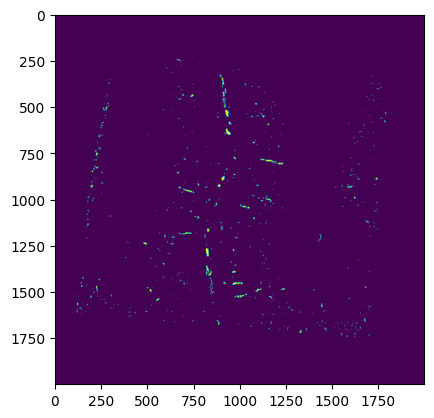

In [129]:
plt.imshow(mask[::10, ::10])

In [143]:
reader_ = deepcopy(reader)
reader_.geojson_data = data_
reader_.shape_data = _parse_geojson_data(data_)[1]

In [144]:
mask_ = reader_.to_mask((20000, 20000))

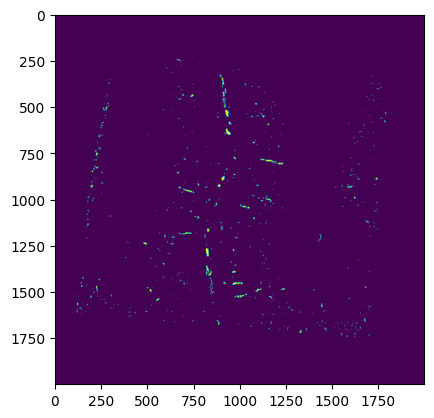

In [145]:
plt.imshow(mask_[::10, ::10])

In [204]:
paht_original = Path(r"/Users/lgmigas/Documents/_projects_/2025_xenium_brain/xenium-wsireg/OPC.txt")
ro = get_simple_reader(paht_original)
path_new = Path(r"/Users/lgmigas/Documents/_projects_/2025_xenium_brain/2025-02-test-v3.wsireg/Images/OPC_to_post-xenium-pre-thiazine_registered.txt")
rn = get_simple_reader(path_new)

In [205]:
sho = ro.to_shapely()
shn = rn.to_shapely()

In [206]:
kws1 = ro.to_shapes_kwargs()
kws2 = rn.to_shapes_kwargs()

In [207]:
assert len(ro.shape_data) == len(rn.shape_data), f"Number of shapes do not match: {len(ro.shape_data)} != {len(rn.shape_data)}"
for i in range(len(ro.shape_data)):
    assert len(ro.shape_data[i]) == len(rn.shape_data[i]), f"Number of points in shape {i} do not match: {len(ro.shape_data[i])} != {len(rn.shape_data[i])}"

In [208]:
for so, sn in zip(kws1["data"], kws2["data"]):
    assert len(so) == len(sn), f"Number of shapes do not match: {len(so)} != {len(sn)}"
    for o, n in zip(so, sn):
        assert len(o) == len(n), f"Number of points in shape do not match: {len(o)} != {len(n)}"

In [209]:
for i, shape in enumerate(ro.shape_data):
    if shape["shape_name"] == "emkdoibc-1":
        print("found")
        break

found


In [210]:
df

,x,y,unique_index,outer,inner,type
0,1800.715380,24626.840731,1,0,0,mp
1,1800.675177,24657.613069,1,0,0,mp
2,1803.751667,24657.616728,1,0,0,mp
3,1803.747646,24660.693961,1,0,0,mp
4,1806.824136,24660.697620,1,0,0,mp
...,...,...,...,...,...,...
49629,27446.324795,8178.726748,1,882,0,mp
49630,27446.320775,8181.803982,1,882,0,mp
49631,27443.244285,8181.800323,1,882,0,mp
49632,27443.240265,8184.877557,1,882,0,mp


In [199]:
ro.shape_data[i]

{'array': array([[5560.3286, 2944.732 ],
        [5559.7026, 2940.4912],
        [5558.0156, 2936.8843],
        [5544.4697, 2931.134 ],
        [5531.754 , 2933.6523],
        [5529.2085, 2935.1313],
        [5523.8833, 2948.4749],
        [5525.989 , 2954.4143],
        [5530.2153, 2959.0862],
        [5553.305 , 2959.768 ],
        [5557.9766, 2954.69  ],
        [5560.324 , 2946.6396],
        [5560.3286, 2944.732 ]], dtype=float32),
 'shape_type': 'polygon',
 'shape_name': 'emkdoibc-1'}

In [211]:
rn.shape_data[i]

{'array': array([[5475.095 , 2418.9575],
        [5745.932 , 2291.9524],
        [5745.93  , 2292.022 ],
        [5733.9165, 2282.9897],
        [5723.065 , 2283.0276],
        [5720.024 , 2283.0598],
        [5712.9263, 2293.9014],
        [5715.994 , 2306.0127],
        [5715.9023, 2306.0156],
        [5743.019 , 2309.9712],
        [5742.932 , 2309.992 ],
        [5746.0845, 2302.9885],
        [5746.902 , 2301.074 ]], dtype=float32),
 'shape_type': 'polygon',
 'shape_name': 'emkdoibc-1'}

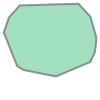

In [212]:
sho[i]

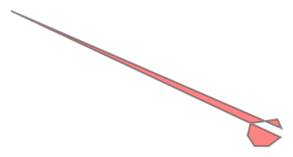

In [213]:
shn[i]

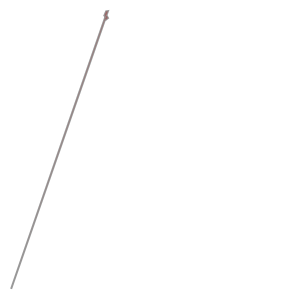

In [178]:
i += 1
shn[i]